# <center> IIIT Vadodara </center>
## <center> Winter 2022-23 </center>
## <center> CS/IT 308 Machine Learning Lab</center>
## <center> Lab#2 Bayes' classifier, k-means and k-NN</center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Bayesian decision rule under normality assumption
Hint: use classnote for same

### Consider the following data:
Here, second column represent the class

<BarContainer object of 2 artists>

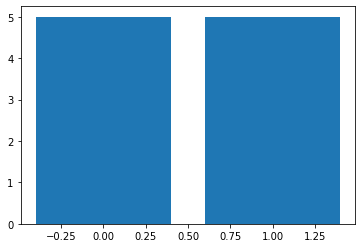

In [ ]:
import collections
# Function to extract the nth element of each sublist in a list
def extract_nth_sublist_element(data, n):
  return [item[n] for item in data]

# Function to count the number of occurrences of each class in a list
def class_distribution(classes):
  count = collections.Counter(classes)
  return count

# Example dataset
dataset = np.array([[3.39,0],[3.58,0],[2.28,0],[7.42,1],[5.74,1],[9.17,1],[7.79,1],[7.93,1],[1.34,0],[3.11,0]])

# Extract features and classes from dataset
features = extract_nth_sublist_element(dataset, 0)
classes = extract_nth_sublist_element(dataset, 1)

# Count the number of occurrences of each class
class_count = class_distribution(classes)

# Plot the class distribution
plt.bar(class_count.keys(), class_count.values())

### Find class probability $P_1$ and $P_2$

Counter({0.0: 0.5, 1.0: 0.5})


<BarContainer object of 2 artists>

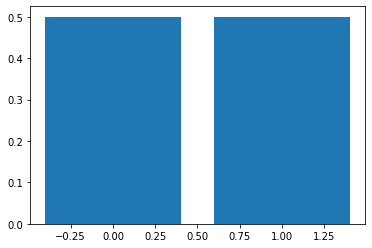

In [ ]:
#write code here
def getProbability(dataset):
  # Get the class distribution
  class_count = class_distribution(classes)
  # Get the total number of instances in the dataset
  total = sum(list(class_count.values()))
  # Get the probability of each class
  class_probability = collections.Counter({key : class_count[key] / total for key in class_count})
  return class_probability

class_probability = getProbability(dataset)
print(class_probability)

# Plot the class probability
plt.bar(class_probability.keys(), class_probability.values())

### Find sample mean and sample standard deviation for each class 

In [ ]:
#write code here
# Function to separate the dataset into different classes
def seperate_classes(dataset, feature_index, class_index):
    # Extract the features and classes from the dataset
    features = extract_nth_sublist_element(dataset, feature_index)
    classes = extract_nth_sublist_element(dataset, class_index)
    # Create a dictionary to store the separated classes
    sep = collections.Counter()
    for c in classes:
        sep[c] = []
    # Append the corresponding feature to the appropriate class
    for i in range(len(classes)):
        sep[classes[i]].append(features[i])
    return sep

# Function to get the mean of each class
def get_mean(sep):
    means = collections.Counter({ key: sum(sep[key])/len(sep[key]) for key in sep.keys() })
    return means

# Function to get the standard deviation of each class
def get_sd(sep):
    means = get_mean(sep)
    sd = collections.Counter()
    keys = sep.keys()
    for key in keys:
        n = len(sep[key])
        devsq = [(x - means[key])**2 for x in sep[key]]
        sd[key] = (sum(devsq) / n) ** 0.5
    return sd

# Example dataset
dataset = np.array([[3.39,0],[3.58,0],[2.28,0],[7.42,1],[5.74,1],[9.17,1],[7.79,1],[7.93,1],[1.34,0],[3.11,0]])

# Separate the dataset into different classes
sep = seperate_classes(dataset, 0, 1)
# Get the mean and standard deviation of each class
means = get_mean(sep)
sd = get_sd(sep)

# Print the mean and standard deviation of each class
print("Means: ", means)
print("Standard Deviation: ", sd)

Means:  Counter({1.0: 7.609999999999999, 0.0: 2.7399999999999998})
Standard Deviation:  Counter({1.0: 1.1046628444914763, 0.0: 0.8290476463991681})


### Plot $p_1(x)$ and $p_2(x)$

In [ ]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    # Calculate the exponent term of the Gaussian distribution formula
    exponent = -(x - mean)**2 / (2 * stdev**2)
    # Calculate the probability using the Gaussian distribution formula
    probability = (np.exp(exponent)) / ((2 * np.pi)**0.5 * stdev)
    return probability

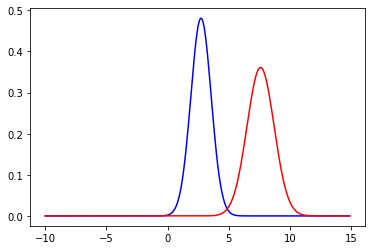

In [ ]:
x  = np.arange(-10,15,0.1)
plt.plot(x,calculate_probability(x,means[0],sd[0]),'b',x,calculate_probability(x,means[1],sd[1]),'r')

### Test for $x=3$  and $x=5$

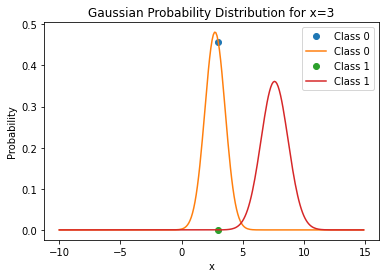

0.45811391919884636 5.9689333421053696e-05


In [ ]:
#for x=3
#write code here
# Calculate the probability for x=3 in class 0
val1 = calculate_probability(3, means[0], sd[0])
# Plot a point for x=3 in class 0
plt.plot(3, val1, 'o', label='Class 0')
# Plot the Gaussian probability distribution for x in class 0
plt.plot(x, calculate_probability(x, means[0], sd[0]), label='Class 0')

# Calculate the probability for x=3 in class 1
val2 = calculate_probability(3, means[1], sd[1])
# Plot a point for x=3 in class 1
plt.plot(3, val2, 'o', label='Class 1')
# Plot the Gaussian probability distribution for x in class 1
plt.plot(x, calculate_probability(x, means[1], sd[1]), label='Class 1')

plt.legend()
plt.xlabel("x")
plt.ylabel("Probability")
plt.title("Gaussian Probability Distribution for x=3")
plt.show()

print(val1, val2)

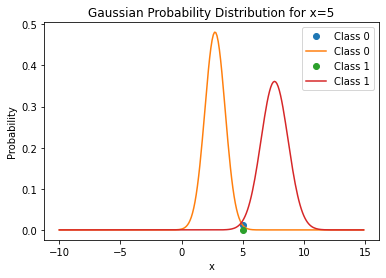

0.011713047666685444 5.9689333421053696e-05


In [ ]:
#for x=5
#write code here
# Calculate the probability for x=5 in class 0
val1 = calculate_probability(5, means[0], sd[0])
# Plot a point for x=5 in class 0
plt.plot(5, val1, 'o', label='Class 0')
# Plot the Gaussian probability distribution for x in class 0
plt.plot(x, calculate_probability(x, means[0], sd[0]), label='Class 0')

# Calculate the probability for x=5 in class 1
val2 = calculate_probability(3, means[1], sd[1])
# Plot a point for x=5 in class 1
plt.plot(5, val2, 'o', label='Class 1')
# Plot the Gaussian probability distribution for x in class 1
plt.plot(x, calculate_probability(x, means[1], sd[1]), label='Class 1')

plt.legend()
plt.xlabel("x")
plt.ylabel("Probability")
plt.title("Gaussian Probability Distribution for x=5")
plt.show()

print(val1, val2)

## Homework:
1. Try for this 2-D data using classnote.
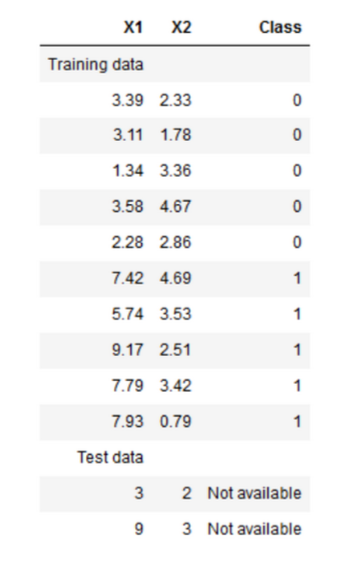 
2. Implement Bayesian classifier for iris data.
You can get help from following link. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

Counter({1.0: [7.42, 5.74, 9.17, 7.79, 7.93], 0.0: [3.39, 3.11, 1.34, 3.58, 2.28]}) Counter({1.0: [4.69, 4.69, 2.51, 3.42, 0.79], 0.0: [2.33, 1.78, 3.36, 4.67, 2.86]})
Counter({1.0: 7.609999999999999, 0.0: 2.7399999999999998}) Counter({1.0: 3.22, 0.0: 3.0}) 1.1046628444914763 1.1046628444914763
2.7399999999999998 7.609999999999999 1.1046628444914763 1.1046628444914763
3 2 0.0849853528835181
3 2 1.1485016638731552e-05
9 3 1.5512712448138056e-08
9 3 0.043980263105996356


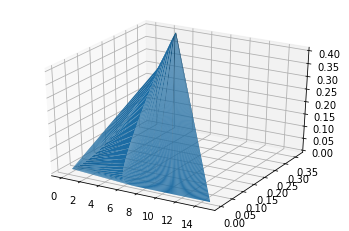

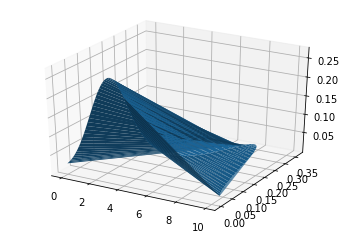

In [ ]:
#write code here
dataset = [
    [3.39, 2.33, 0.0], 
    [3.11, 1.78, 0.0], 
    [1.34, 3.36, 0.0], 
    [3.58, 4.67, 0.0], 
    [2.28, 2.86, 0.0], 
    [7.42, 4.69, 1.0], 
    [5.74, 4.69, 1.0], 
    [9.17, 2.51, 1.0], 
    [7.79, 3.42, 1.0], 
    [7.93, 0.79, 1.0]
]

feature1 = extract_nth_sublist_element(dataset, 0)
feature2 = extract_nth_sublist_element(dataset, 1)
classes = extract_nth_sublist_element(dataset, 2)

class_count = class_distribution(classes)

class_prob = getProbability(dataset)

sep1 = seperate_classes(dataset, 0, 2) 
sep2 = seperate_classes(dataset, 1, 2) 

print(sep1, sep2)

means1 = get_mean(sep1) 
means2 = get_mean(sep2)
std1 = get_sd(sep1)
std2 = get_sd(sep2) 
print(means1, means2, sd[0], sd[1])

mu1, mu2, sd[0], sd[0] = means1[0.0], means1[1.0], std1[0.0], std1[1.0]
print(mu1, mu2, sd[0], sd[1])
mu11, mu22, sd11, sd22 = means2[0.0], means2[1.0], std2[0.0], std2[1.0]


fig = plt.figure()
ax = plt.axes(projection='3d')
x  = np.arange(0,15,0.1)
x1 = calculate_probability(x, mu1, sd[0])
x2 = calculate_probability(x, mu11, sd11)
ax.plot_trisurf(x, x1, x2)
print(3, 2, calculate_probability(3, mu1, sd[0]) * calculate_probability(2, mu11, sd11))
print(3, 2, calculate_probability(3, mu2, sd[1]) * calculate_probability(2, mu22, sd22))
# 3 2 is in class 0

fig = plt.figure()
ax = plt.axes(projection='3d')
x  = np.arange(0,10,0.1)
x1 = calculate_probability(x, mu2, sd[1])
x2 = calculate_probability(x, mu22, sd22)
ax.plot_trisurf(x, x1, x2)
print(9, 3, calculate_probability(9, mu1, sd[0]) * calculate_probability(3, mu11, sd11))
print(9, 3, calculate_probability(9, mu2, sd[0]) * calculate_probability(3, mu22, sd22))
# 9 3 is in class 1

## 2. K-Nearest neighbour (KNN)

Consider the following observations:
<br>
>Sr.No. | Feature 1 | Feature 2 | Class
>--- | --- | --- | ---
Training data
>1 | -2 | -1 | C1
>2 | -2 |  1 | C2
>3 | -2 |  2 | C2
>4 | -1 | -1 | C1
>5 |  1 | -1 | C1
>6 |  1 |  1 | C3
>7 |  1 |  2 | C3
>8 |  2 |  1 | C3
Test data
>1 | -1 |  1 | Not available

Use KNN technique to classify the test data using K=3.

Hint: 
<br>
1) Calculate the Euclidean distance between the new point and the existing points.
<br>
2) Sort out the points distance-wise.
<br>
3) Now select the k-neighbours. 

In [ ]:
data = np.float32([[-2,-1,1],[-2,1,2],[-2,2,2],[-1,-1,1],[1,-1,1],[1,1,3],[1,2,3],[2,1,3]])
print('Feature1|Feature2|Class')
print(data)

Feature1|Feature2|Class
[[-2. -1.  1.]
 [-2.  1.  2.]
 [-2.  2.  2.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]


Class Count :  Counter({1.0: 3, 3.0: 3, 2.0: 2})


<BarContainer object of 3 artists>

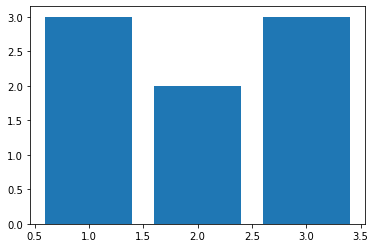

In [ ]:
#write code here
# Get the first and second feature values and class labels from the dataset
feat1 = extract_nth_sublist_element(data, 0)
feat2 = extract_nth_sublist_element(data, 1)
class_labels = extract_nth_sublist_element(data, 2)

# Get the class distribution
class_count = class_distribution(class_labels)

# Print the class count and create a bar plot of the class count
print("Class Count : ", class_count)
plt.bar(class_count.keys(), class_count.values())

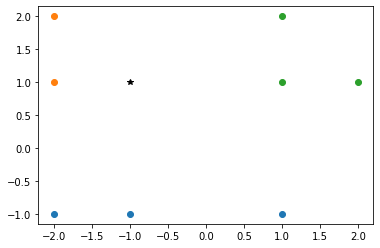

In [ ]:
def get_euclidean_distance(pt1, pt2):
    #Calculate the euclidean distance between two points.
    # pt is n dimensional
    dist = 0.0
    for i in range(len(pt1)):
        dist += (pt1[i] - pt2[i])**2
    return dist**0.5

# Separate the features of the different classes
f1 = seperate_classes(data, 0, 2)
f2 = seperate_classes(data, 1, 2)

# Plot the points for each class
for c in f1.keys():
    plt.plot(f1[c], f2[c], 'o')

# Plot a test point
plt.plot(-1, 1, '*k')


Predicted Class:  2.0


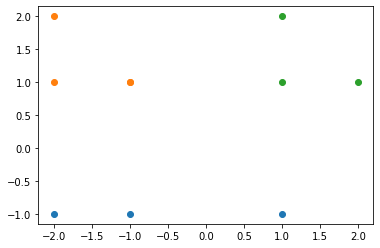

In [ ]:
# Point for which we need to predict the class
test_pt = [-1, 1]

# Function to get n nearest neighbours of the test point
def get_n_neighbours(data, pt, n):
  distances = []
  for d in data:
    dist = get_euclidean_distance([d[0], d[1]], pt)
    distances.append((d, dist))
  distances.sort(key=lambda tup: tup[1]) # sorting according to distance 
  neighbors = []
  for i in range(n):
    neighbors.append(distances[i][0])
  return neighbors

# Function to do prediction
def predict(data, test, n):
  neighbours = get_n_neighbours(data, test, n)
  cls = extract_nth_sublist_element(neighbours, 2)
  cls_cnt = class_distribution(cls)
  predicted_class = cls_cnt.most_common(1)[0][0]
  return predicted_class

predicted_class = predict(data, test_pt, 3)
print("Predicted Class: ",predicted_class)

f1[predicted_class].append(test_pt[0])
f2[predicted_class].append(test_pt[1])
for c in f1.keys():
  plt.plot(f1[c], f2[c], 'o')


## 3. K-Means

Ignore the class information of the training data given in problem 2 and use K-means algorithm to classify the same. Assume the initial starting classes as:  
<br>
C1={observations 1,2}
<br>
C2={observations 3,4,5}
<br>
C3={observations 6,7,8}
<br>

Now using the result find the class that would be assigned to the test data.

<br>
Hint: 

1) Find the centroid (mean) of each cluster based on the initial classes assignment given.

2) Find out the Euclidean distance between each point and each cluster centroid. 

3) Assign all the points to the closest cluster centroid.

4) Recompute centroids of newly formed clusters.

5) Stop if the new centroids are same as old centroids else repeat step 2 to 4. 

In [ ]:
# Initial classes
C1 = [1, 2]
C2 = [3, 4, 5]
C3 = [6, 7, 8]

# Function to calculate centroid of a cluster
def calculate_centroid(cluster):
    centroid = np.mean(cluster, axis=0)
    return centroid

# Function to calculate Euclidean distance between point and centroid
def euclidean_distance(point, centroid):
    return np.linalg.norm(point - centroid)

# Initial centroids
centroids = [calculate_centroid(C1), calculate_centroid(C2), calculate_centroid(C3)]
print("Intial Centroids : ",centroids)

# Data points
data = [1, 2, 3, 4, 5, 6, 7, 8]

# Initial assignments of points to clusters
clusters = [[], [], []]
for point in data:
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    cluster_index = np.argmin(distances)
    clusters[cluster_index].append(point)

# Recompute centroids
new_centroids = [calculate_centroid(cluster) for cluster in clusters]

# Repeat steps 2-4 until new centroids are same as old centroids
while not np.array_equal(centroids, new_centroids):
    centroids = new_centroids
    clusters = [[], [], []]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)
    new_centroids = [calculate_centroid(cluster) for cluster in clusters]
    print("New Centroids : ",new_centroids)

# Assign test data to closest cluster
test_data = [9]
test_distances = [euclidean_distance(test_data, centroid) for centroid in centroids]
test_cluster_index = np.argmin(test_distances)
clusters[test_cluster_index].append(test_data)

print("Final Clusters : ", clusters)


Intial Centroids :  [1.5, 4.0, 7.0]
Final Clusters :  [[1, 2], [3, 4, 5], [6, 7, 8, [9]]]
